# Disclaimer to Dr. Salter:

I'm trying to find ways at present to combine technical communication and video games, as some of the materials I've been reading through have displayed such intricacies. I believe forum use of data is one such location that warrants study, and this exercise ultimately served as a great context for that. For Week Six (after you show us the answer), if this is received well I would like to try again with a different video game-based data set to continue flexing the crossover between the disciplines as I try to figure all this crap out!

## Stage One: Import Libraries/Data

This code utilizes Pandas and a .CSV file from Kaggle titled **Animal Crossing New Horizons Catalog**. There sadly wasn't a comprehensive file with all the information, so I selected the one I liked the most while I played the game -- Fish! Hence, importing fish.csv was as important as importing Pandas.

In [1]:
file_name = 'fish.csv'
import pandas as pd 

df = pd.read_csv(file_name, delimiter=",")

## Stage 2: Display a Summary and Sub-sections of the Data

Because I wasn't doing a Twitter-based data analysis, I decided to run a function that displayed the column names in a succinct format. It was a little awkward for NH and SH to be displayed in different columns (mostly because I didn't understand the data), so I tried to leave those alone. I displayed "Size" as the most interesting of the data types.

In [2]:
for col in df.columns:
    print(col)

print(df.describe(include='all'))

print(df.sample(10))

print(df['Size'])

#
Name
Sell
Where/How
Shadow
Total Catches to Unlock
Spawn Rates
Rain/Snow Catch Up
NH Jan
NH Feb
NH Mar
NH Apr
NH May
NH Jun
NH Jul
NH Aug
NH Sep
NH Oct
NH Nov
NH Dec
SH Jan
SH Feb
SH Mar
SH Apr
SH May
SH Jun
SH Jul
SH Aug
SH Sep
SH Oct
SH Nov
SH Dec
Color 1
Color 2
Size
Lighting Type
Icon Filename
Critterpedia Filename
Furniture Filename
Internal ID
Unique Entry ID
              #       Name          Sell Where/How Shadow  \
count   80.0000         80     80.000000        80     80   
unique      NaN         80           NaN         7      9   
top         NaN  killifish           NaN       Sea  Small   
freq        NaN          1           NaN        29     17   
mean    40.5000        NaN   3745.000000       NaN    NaN   
std     23.2379        NaN   4517.151561       NaN    NaN   
min      1.0000        NaN    100.000000       NaN    NaN   
25%     20.7500        NaN    500.000000       NaN    NaN   
50%     40.5000        NaN   1500.000000       NaN    NaN   
75%     60.2500     

## Stage 3: Clean Your Data

I decided a few sections were useless when reviewing the data. Total Catches to Unlock referred to how you could unlock the ability to catch the fish, which I found irrelevant at the time (but would have made for interesting data). Rain/Snow Catch Up merely looked at if the fish was more common in weather. Color 1 and Color 2 labeled the fish's color. Lighting Type looked at the necessary lighting conditions for the shadow. Icon Filename referred to what the fish would need to look like in-game. Critterpedia Filename looked at the fish in the Critterpedia. Furniture Filename is what the fish would reference in the overworld. Internal ID referenced the fish in the programming, and Unique Entry ID would label the caught fish.

In [3]:
del df['Total Catches to Unlock']
del df['Rain/Snow Catch Up']
del df['Color 1']
del df['Color 2']
del df['Lighting Type']
del df['Icon Filename']
del df['Critterpedia Filename']
del df['Furniture Filename']
del df['Internal ID']
del df['Unique Entry ID']

I also labeled any blank section as **Not available**, which mostly filled in the dates fish couldn't be caught.

In [4]:
df.fillna('Not available')

,#,Name,Sell,Where/How,Shadow,Spawn Rates,NH Jan,NH Feb,NH Mar,NH Apr,...,SH Apr,SH May,SH Jun,SH Jul,SH Aug,SH Sep,SH Oct,SH Nov,SH Dec,Size
0,56,anchovy,200,Sea,Small,2–5,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,...,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,4 AM – 9 PM,1x1
1,36,angelfish,3000,River,Small,2–5,Not available,Not available,Not available,Not available,...,4 PM – 9 AM,Not available,Not available,Not available,Not available,Not available,Not available,4 PM – 9 AM,4 PM – 9 AM,1x1
2,44,arapaima,10000,River,XX-Large,1,Not available,Not available,Not available,Not available,...,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,4 PM – 9 AM,3x2
3,41,arowana,10000,River,Large,1–2,Not available,Not available,Not available,Not available,...,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,4 PM – 9 AM,2x1
4,58,barred knifejaw,5000,Sea,Medium,3–5,Not available,Not available,All day,All day,...,All day,All day,Not available,Not available,Not available,All day,All day,All day,All day,1x1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,23,tilapia,800,River,Medium,7–9,Not available,Not available,Not available,Not available,...,All day,Not available,Not available,Not available,Not available,Not available,Not available,Not available,All day,1x1
76,66,tuna,7000,Pier,XX-Large,2,All day,All day,All day,All day,...,Not available,All day,All day,All day,All day,All day,All day,Not available,Not available,2x1
77,75,whale shark,13000,Sea,Large w/Fin,1,Not available,Not available,Not available,Not available,...,Not available,Not available,Not available,Not available,Not available,Not available,Not available,Not available,All day,3x2
78,21,yellow perch,300,River,Medium,7–10,All day,All day,All day,Not available,...,All day,All day,All day,All day,All day,All day,Not available,Not available,Not available,1x1


## Stage Four: Plot Your Data

Below are three attempts to display the data from the information. The first chart was the Sell price of the fish to the Able Sisters compared to the Shadow Size/Type (including fin). I regret utilizing the Sell price so early, being the only straightforward numerical data to work with.

<AxesSubplot:xlabel='Sell', ylabel='Shadow'>

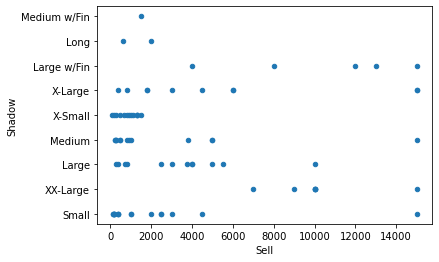

In [5]:
df.plot(x='Sell', y='Shadow', kind="scatter")

Next was the first of two Bar graphs. This first one looks at the average locations that fish could be caught.

Where/How
Pier                 4
Pond                12
River               27
River (clifftop)     4
River (mouth)        3
Sea                 29
Sea (rainy days)     1
dtype: int64


<AxesSubplot:xlabel='Where/How'>

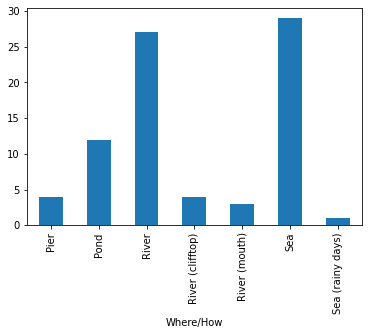

In [10]:
FindingFish = df.groupby('Where/How').size()

print(FindingFish)

FindingFish.plot(kind='bar')

The second Bar graph looks at the average size that fish are when placed as overworld furniture.

Size
1x1    51
2x1    24
2x2     1
3x2     4
dtype: int64


<AxesSubplot:xlabel='Size'>

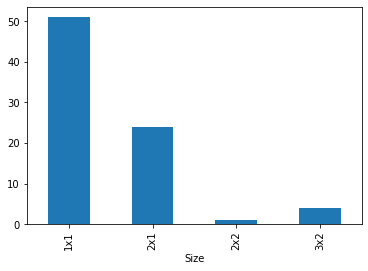

In [12]:
OverworldFurniture = df.groupby('Size').size()

print(OverworldFurniture)

OverworldFurniture.plot(kind='bar')

## Stage Five: Draw Comparisons and Make Claims

Overall, I would have loved to use more of the intrinsic data, such as the dates and times that fish were available. I didn't feel nearly experienced enough with Pandas to utilize the dataset fully. Additionally, stumbling upon the Animal Crossing data was fascinating personally. I have always wondered how different websites and forums build repositories of this data, and I believe those more familiar with CSV files would be really familiar with everything available. I think it's fascinating in games such as this (and Pokemon) to be able to see communities built around available data, and in the future I would love the opportunity to dig into these forums and websites in order to understand technical communication in such a setting.